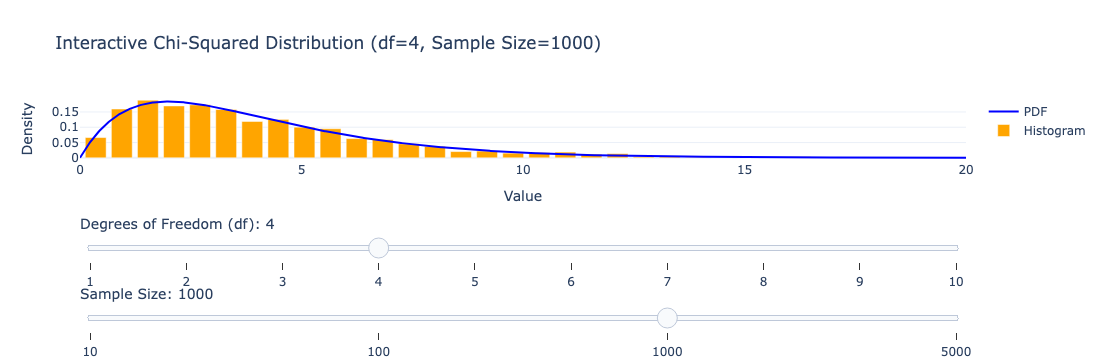

In [11]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import chi2

# Function to generate interactive Chi-Squared data and plot
def generate_interactive_chi_square():
    # Initial parameters
    initial_df = 4  # Degrees of freedom
    initial_sample_size = 1000  # Initial sample size
    x = np.linspace(0, 20, 1000)  # Range for PDF

    # Generate initial data
    def generate_data(df, sample_size):
        y_pdf = chi2.pdf(x, df=df)  # PDF
        sample = np.random.chisquare(df=df, size=sample_size)  # Sample
        hist, bins = np.histogram(sample, bins=30, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        return y_pdf, hist, bin_centers

    y_pdf, hist, bin_centers = generate_data(initial_df, initial_sample_size)

    # Create the figure
    fig = go.Figure()

    # Add PDF trace
    fig.add_trace(go.Scatter(x=x, y=y_pdf, mode='lines', name="PDF", line=dict(color='blue')))

    # Add histogram trace
    fig.add_trace(go.Bar(x=bin_centers, y=hist, name="Histogram", marker=dict(color='orange')))

    # Define slider steps
    df_steps = [
        {
            "label": str(df),
            "method": "update",
            "args": [
                {"y": [chi2.pdf(x, df=df), generate_data(df, initial_sample_size)[1]]},
                {"title": f"Interactive Chi-Squared Distribution (df={df}, Sample Size={initial_sample_size})"}
            ]
        }
        for df in range(1, 11)
    ]

    sample_size_steps = [
        {
            "label": str(sample_size),
            "method": "update",
            "args": [
                {"y": [chi2.pdf(x, df=initial_df), generate_data(initial_df, sample_size)[1]]},
                {"title": f"Interactive Chi-Squared Distribution (df={initial_df}, Sample Size={sample_size})"}
            ]
        }
        for sample_size in [10, 100, 1000, 5000]
    ]

    # Add layout with separated sliders
    fig.update_layout(
        title=f"Interactive Chi-Squared Distribution (df={initial_df}, Sample Size={initial_sample_size})",
        xaxis_title="Value",
        yaxis_title="Density",
        template="plotly_white",
        sliders=[
            {
                "active": initial_df - 1,
                "currentvalue": {"prefix": "Degrees of Freedom (df): ", "font": {"size": 14}},
                "pad": {"t": 50},  # Top padding for the first slider
                "steps": df_steps,
            },
            {
                "active": 2,  # Index for initial_sample_size (1000)
                "currentvalue": {"prefix": "Sample Size: ", "font": {"size": 14}},
                "pad": {"t": 120},  # Additional padding to avoid overlap
                "steps": sample_size_steps,
            }
        ]
    )

    # Save as HTML
    fig.write_html("chi_squared_interactive.html")

    return fig

# Generate the chart
fig = generate_interactive_chi_square()
fig.show()

